In [2]:
from pathlib import Path
from utils.vis_utils import model_params,visualization_pre,visualization_bbox, visualization_bbox_dir,visualization_pre_dir
from utils.eff_utils import load_yaml
path = Path.cwd()

/home/mazheng/miniconda3/envs/eff/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '0'

In [11]:
project_name = "0509split"
# project_name = "4-4"
# project_name = "detection-untunnel"
compound_coef = 2
threshold = 0.3
iou_threshold = 0.2
# model_path = 'logs/0509split/efficientdet-d2_71_145500.pth'
model_path = 'logs/0509split/efficientdet-d2_125_253500.pth'

In [12]:
ann_json = path / 'datasets/{}/annotations/instances_val.json'.format(project_name)
# ann_json = path / 'datasets/val_dataset/0409/0409notunnel/instance_val.json'
img_path = path / 'datasets/{}/val'.format(project_name)
# img_path = Path('datasets/val_dataset/0409/0409notunnel/img')
# img_path = Path('datasets/4-4')
yaml_path = path / 'projects/{}.yml'.format(project_name)
# yaml_path = path / 'projects/{}_3anchor.yml'.format(project_name)
# yaml_path = path / 'projects/0414split.yml'

project_params = load_yaml(str(yaml_path))

ratios=eval(project_params['anchors_ratios'])
scales=eval(project_params['anchors_scales'])
# scales=[(2 ** 0)/2, (2 ** (1.0 / 3.0))/2, (2 ** (2.0 / 3.0))/2]
# ratios=[(0.6, 1.6), (1.2, 0.8), (1.7, 0.6)]
obj_list = project_params['obj_list']
params = model_params(compound_coef, obj_list, ratios, scales, model_path)

In [13]:
params

model_params(compound_coef=2, obj_list=['pounding', 'pothole', 'hcrack', 'rsign', 'vcrack', 'animal', 'csign', 'people', 'indicator-red', 'lcrack', 'spiledmaterial', 'tsign', 'gantry', 'osign', 'bsign', 'label', 'fracturing', 'indicator-green', 'indicator-off', 'light-off'], ratios=[(0.7, 1.5), (0.9, 1.1), (1.2, 0.8), (1.7, 0.6), (3.3, 0.3)], scales=[0.35714285714285715, 0.44997180353388333, 0.5669289471314998], model_path='logs/0509split/efficientdet-d2_125_253500.pth')

In [14]:
# visualization_bbox_dir(str(ann_json),str(img_path),obj_list=obj_list,save_path="fig/{}/val/true_bbox".format(project_name))
# visualization_pre_dir(params, str(img_path), threshold, iou_threshold, save_path="fig/{}/pre_bbox".format(project_name))
# visualization_pre_dir(params, str(img_path), threshold, iou_threshold, save_path="fig/{}/pre_bbox_1024".format(project_name),force_input_size=1024)

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!


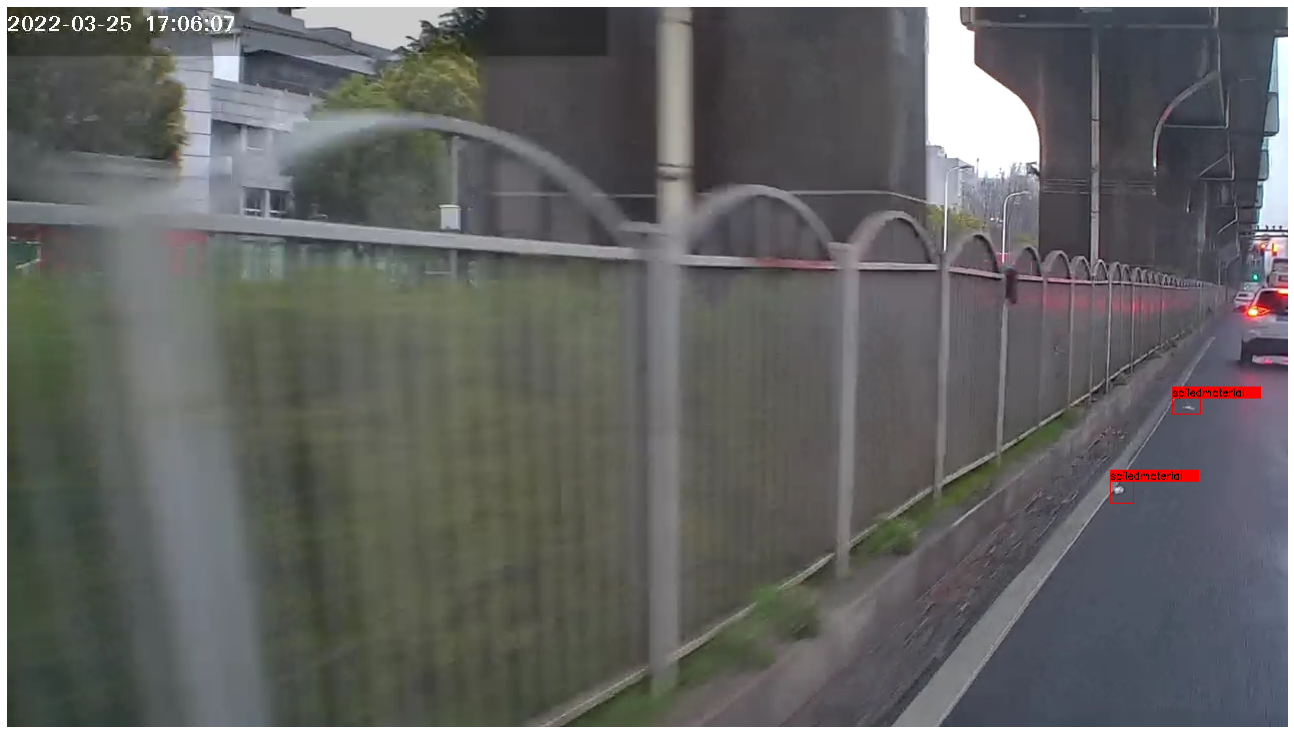

<Figure size 432x288 with 0 Axes>

In [89]:
img_name = "DLLJ1796.jpg"
visualization_bbox(img_name,str(ann_json),str(img_path),obj_list=obj_list)
visualization_pre(
    params,
    str(img_path/img_name),
    threshold,
    iou_threshold,
)

In [27]:
img_name_list = []
for f in img_path.iterdir():
    img_name_list.append(f.name)

In [28]:
# i = 20
i = 1

LF19759.jpg
c_img_idx/all_img_count:57/1800
loading annotations into memory...
Done (t=0.03s)
creating index...
index created!


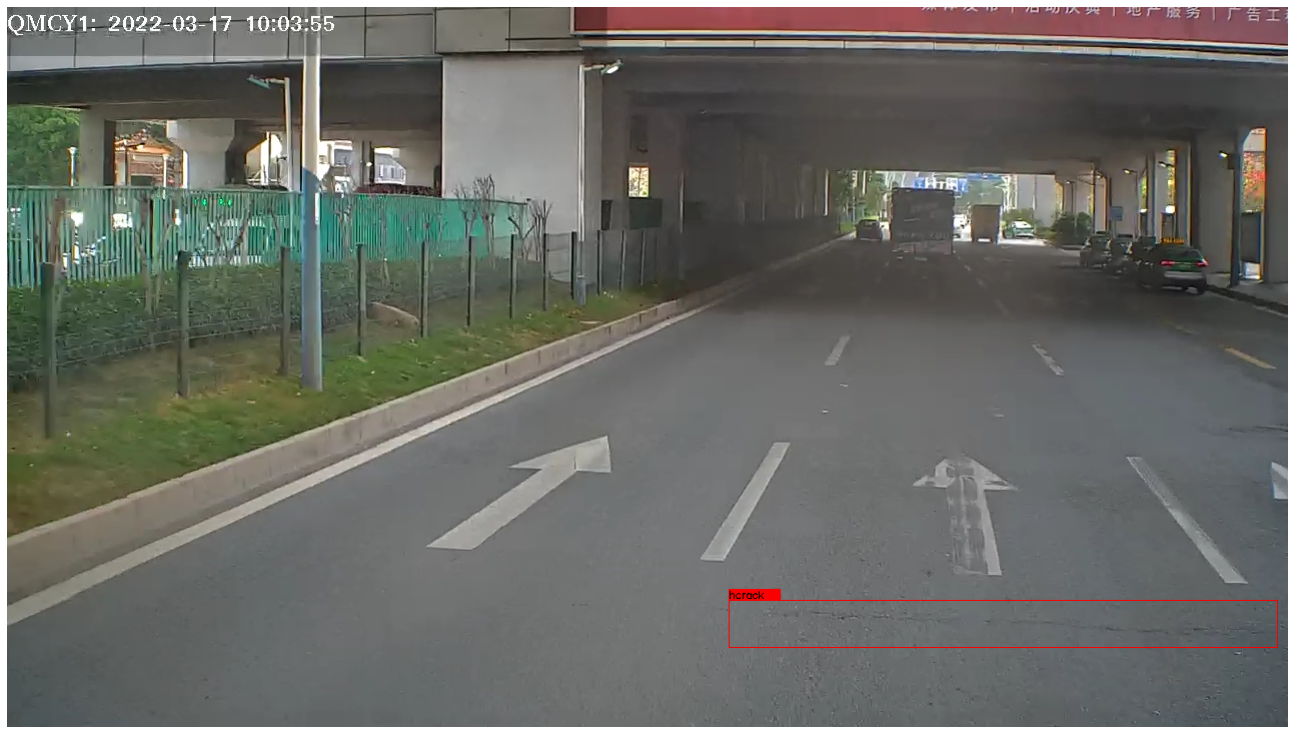

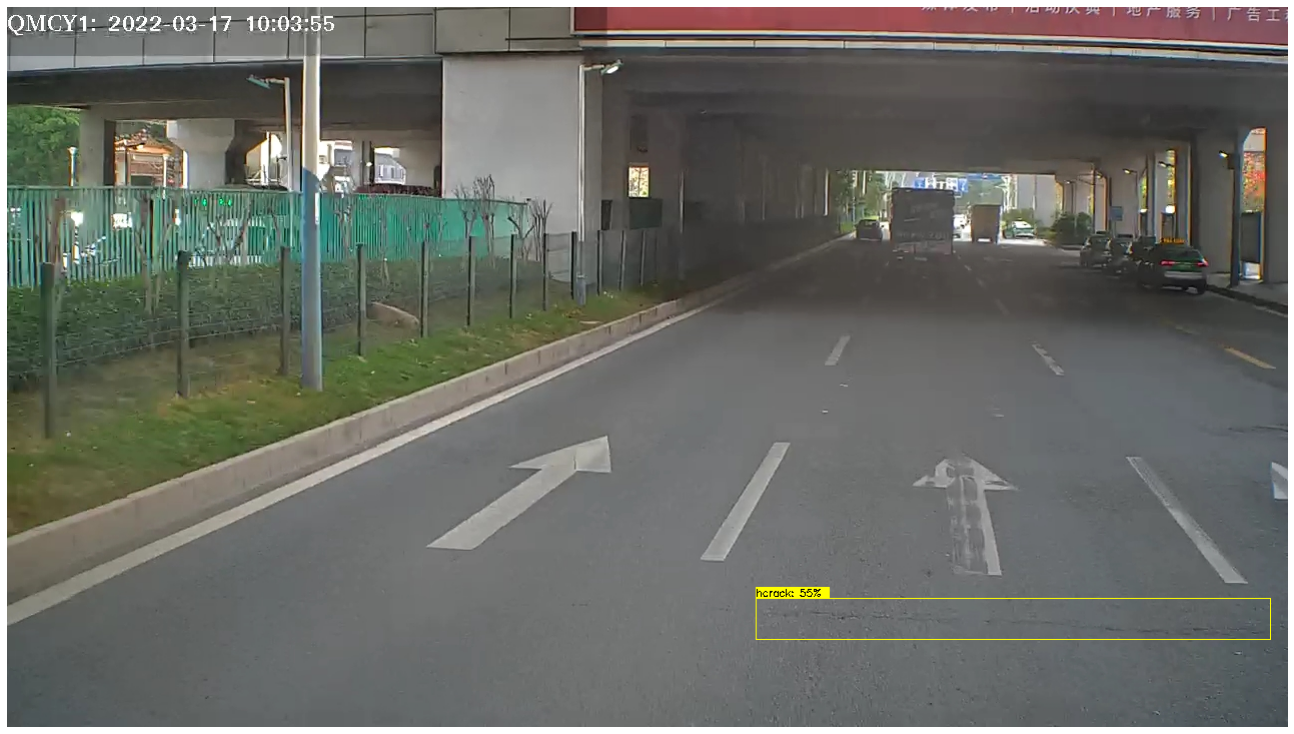

In [85]:
img_name = img_name_list[i]
print(img_name)
print(f"c_img_idx/all_img_count:{i}/{len(img_name_list)}")
visualization_bbox(img_name,str(ann_json),str(img_path),obj_list=obj_list)
visualization_pre(
    params,
    str(img_path/img_name),
    threshold,
    iou_threshold,
)
i+=1

In [87]:
os.environ["WEIGHT_PATH"] = str(model_path)
os.environ["COEF"] = str(compound_coef)
os.environ["PROJECT"] = str(project_name)
# !$WEIGHT_DIR
# ! echo $COEF
! python coco_eval.py -c $COEF -p $PROJECT -w $WEIGHT_PATH -f 2

running coco-style evaluation on project 0422split, weights logs/0422split_d2/efficientdet-d2_50_83000.pth...
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
100%|█████████████████████████████████████████| 200/200 [00:26<00:00,  7.44it/s]
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
BBox
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.13s).
Accumulating evaluation results...
bbox_count: 7
tp: 1.0
fp: 6.0
fn: 6.0
bbox_count: 49
tp: 10.0
fp: 43.0
fn: 39.0
bbox_count: 87
tp: 39.0
fp: 45.0
fn: 48.0
bbox_count: 113
tp: 93.0
fp: 50.0
fn: 20.0
bbox_count: 63
tp: 44.0
fp: 84.0
fn: 19.0
bbox_count: 25
tp: 17.0
fp: 12.0
fn: 8.0
bbox_count: 87
tp: 69.0
fp: 66.0
fn: 18.0
bbox_count: 2
tp: 0.0
fp: 1.0
fn: 2.0
bbox_count: 30
tp: 13.0
fp: 31.0
fn: 17.0
bbox_count: 5
tp: 1.0
fp: 5.0
fn: 4.0
bbox_count: 8
tp: 4.0
fp: 7.0
fn: 4.0
bbox_count: 9
tp: 4.0
fp: 7.0
fn: 5.0
bbox_count: 6
tp: 4.0
fp: 5.0
fn: 2.0
bbo

In [84]:
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

In [85]:
# SET_NAME = ann_path_val
VAL_GT = str(ann_json)
VAL_IMGS = str(img_path)
pred_json_path = 'val_bbox_results.json'
MAX_IMAGES = 10000
coco_gt = COCO(VAL_GT)
image_ids = coco_gt.getImgIds()[:MAX_IMAGES]

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [21]:
# _eval(coco_gt, image_ids, pred_json_path)
coco_pred = coco_gt.loadRes(pred_json_path)

# run COCO evaluation
print("BBox")
coco_eval = COCOeval(coco_gt, coco_pred, "bbox")
coco_eval.params.imgIds = image_ids
coco_eval.params.catIds = [1]
coco_eval.params.iouThrs = [0.05]
coco_eval.evaluate()
coco_eval.accumulate()
coco_eval.summarize()

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
BBox
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.03s).
Accumulating evaluation results...
bbox_count: 97
tp: 57.0
fp: 27.0
fn: 40.0
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.05:0.05 | area=   all | maxDets=100 ] = 0.522
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.05:0.05 | area= small | maxDets=100 ] = 0.191
 Average Precision  (AP) @[ IoU=0.05:0.05 | area=medium | maxDets=100 ] = 0.583
 Average Precision  (AP) @[ IoU=0.05:0.05 | area= large | maxDets=100 ] = 0.905
 Average Recall     (AR) @[ IoU=0.05:0.05 | area=   all | maxDets=  1 ] = 0.330
 Average Recall     (AR) @[ IoU=0.05:0.05 | area=   all | maxDets= 10 ] = 0.588
 Average Recall     (AR) @[ IoU=0.05:0.05 | area=   all | maxDets=100 ] = 0.588
 Average Recall    

In [88]:
f=open('tp.txt')
line = f.readline().strip() #读取第一行
txt=[]
txt.append(line)
while line:  # 直到读取完文件
   line = f.readline().strip()  # 读取一行文件，包括换行符
   txt.append(line)
f.close()  # 关闭文件
output = [i.split(' ') for i in txt]
output_ = []
tmp = dict()
for i in output:
    if i[0] == 'bbox_count:':
        if len(tmp) == 1:
            output_.append([])
        tmp = dict([('bbox_count',float(i[1]))])
    if i[0] == "tp:":
        tmp["tp"]=float(i[1])
    if i[0] == "fp:":
        tmp["fp"]=float(i[1])
    if i[0] == "fn:":
        tmp["fn"]=float(i[1])
        output_.append([tmp["fn"]/tmp["bbox_count"],tmp["fp"]/(tmp["tp"]+tmp["fp"])])

output_

[[0.8571428571428571, 0.8571428571428571],
 [0.7959183673469388, 0.8113207547169812],
 [0.5517241379310345, 0.5357142857142857],
 [0.17699115044247787, 0.34965034965034963],
 [0.30158730158730157, 0.65625],
 [0.32, 0.41379310344827586],
 [0.20689655172413793, 0.4888888888888889],
 [1.0, 1.0],
 [0.5666666666666667, 0.7045454545454546],
 [0.8, 0.8333333333333334],
 [0.5, 0.6363636363636364],
 [0.5555555555555556, 0.6363636363636364],
 [0.3333333333333333, 0.5555555555555556],
 [0.3333333333333333, 0.2]]